In [3]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

%matplotlib notebook

In [4]:
image = cv2.imread(r"D:\Datasets\LinescanPrinting\Hutamaki\blue_05052020.bmp")
# convert to grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# split R,G,B
b, g, r = cv2.split(image)

In [19]:
def plotHist(img, hist):
    plt.hist(img.ravel(),256,[0,256])
    plt.xlim([0,256])
    plt.show()

def GlobalEq(gray):
    equalized = None
    equalized = cv2.equalizeHist(gray)
    return equalized

def ClaheEq(gray):
    equalized = None
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    equalized = clahe.apply(gray)
    return equalized

def AdjustEq(gray, tol=1, in_bound=(0,255), out_bound=(0,255)):
    equalized = gray.copy()
    tol = max(0, min(100,tol))
    if tol > 0:
        hist = cv2.calcHist([equalized],[0],None,[256],[0,256])
        plotHist(equalized, hist)
        
        cum_hist = hist.copy()
        for i in range(1, len(cum_hist)):
            cum_hist[i] = cum_hist[i-1] + hist[i]
        
        total = gray.shape[0] * gray.shape[1]
        low_bound = total * tol/100
        upp_bound = total * (100-tol)/100
        

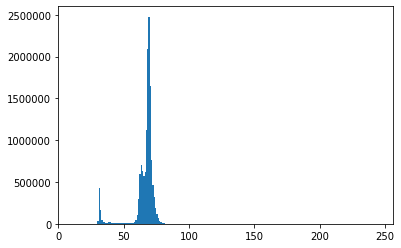

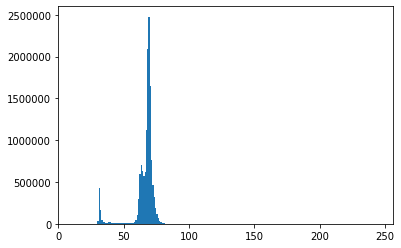

In [20]:
geq = GlobalEq(gray)
cv2.imwrite("global_eq.bmp", geq)
ceq = ClaheEq(gray)
cv2.imwrite("clahe_eq.bmp", ceq)
aeq = AdjustEq(gray)